In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('C:/Users/User/Desktop/r8/r8_dataset/r8-train-stemmed.csv')
valid_df = pd.read_csv('C:/Users/User/Desktop/r8/r8_dataset/r8-dev-stemmed.csv')
test_df = pd.read_csv('C:/Users/User/Desktop/r8/r8_dataset/r8-test-stemmed.csv')
train_df.head()

,text,edge,intent
0,champion product approv stock split champion p...,champion product approv stock split champion p...,earn
1,comput termin system cpml complet sale comput ...,comput termin system cpml complet sale comput ...,acq
2,cobanco inc cbco year net shr ct dlr net asset...,cobanco inc cbco year net shr ct dlr net asset...,earn
3,intern inc qtr jan oper shr loss two ct profit...,intern inc qtr jan oper shr loss two ct profit...,earn
4,brown forman inc bfd qtr net shr dlr ct net ml...,brown forman inc bfd qtr net shr dlr ct net ml...,earn


In [3]:
train_df.shape

(4937, 3)

In [4]:
valid_df.shape

(547, 3)

In [5]:
test_df.shape

(2189, 3)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4937 non-null   object
 1   edge    4937 non-null   object
 2   intent  4937 non-null   object
dtypes: object(3)
memory usage: 115.8+ KB


In [7]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    547 non-null    object
 1   edge    547 non-null    object
 2   intent  547 non-null    object
dtypes: object(3)
memory usage: 12.9+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2189 non-null   object
 1   edge    2189 non-null   object
 2   intent  2189 non-null   object
dtypes: object(3)
memory usage: 51.4+ KB


하나의 train 데이터로 결합한 뒤에 학습 단계에서 다시 valid 데이터를 분할

In [9]:
# train_df와 valid_df 결합
train_val_df = pd.concat([train_df, valid_df])

text와 edge는 동일한 것으로 판단되므로 text만 활용하여 모델 학습

In [10]:
list(train_val_df['text'])[1]

'comput termin system cpml complet sale comput termin system inc complet sale share common stock and warrant acquir addit mln share sedio lugano switzerland for dlr compani warrant exercis for year purchas price dlr per share comput termin sedio bui addit share and increas total hold pct comput termin outstand common stock circumst involv chang control compani compani condit occur warrant exercis price equal pct common stock market price time not exce dlr per share comput termin sold technolgi right dot matrix impact technolog includ futur improv woodco inc houston tex for dlr continu exclus worldwid license technolog for woodco compani move part reorgan plan and pai current oper cost and ensur product deliveri comput termin make comput gener label form tag and ticket printer and termin reuter'

In [11]:
list(train_val_df['edge'])[1]

'comput termin system cpml complet sale comput termin system inc complet sale share common stock and warrant acquir addit mln share sedio lugano switzerland for dlr compani warrant exercis for year purchas price dlr per share comput termin sedio bui addit share and increas total hold pct comput termin outstand common stock circumst involv chang control compani compani condit occur warrant exercis price equal pct common stock market price time not exce dlr per share comput termin sold technolgi right dot matrix impact technolog includ futur improv woodco inc houston tex for dlr continu exclus worldwid license technolog for woodco compani move part reorgan plan and pai current oper cost and ensur product deliveri comput termin make comput gener label form tag and ticket printer and termin reuter'

In [12]:
train_val_df['intent'].unique()

array(['earn', 'acq', 'trade', 'ship', 'grain', 'crude', 'interest',
       'money-fx'], dtype=object)

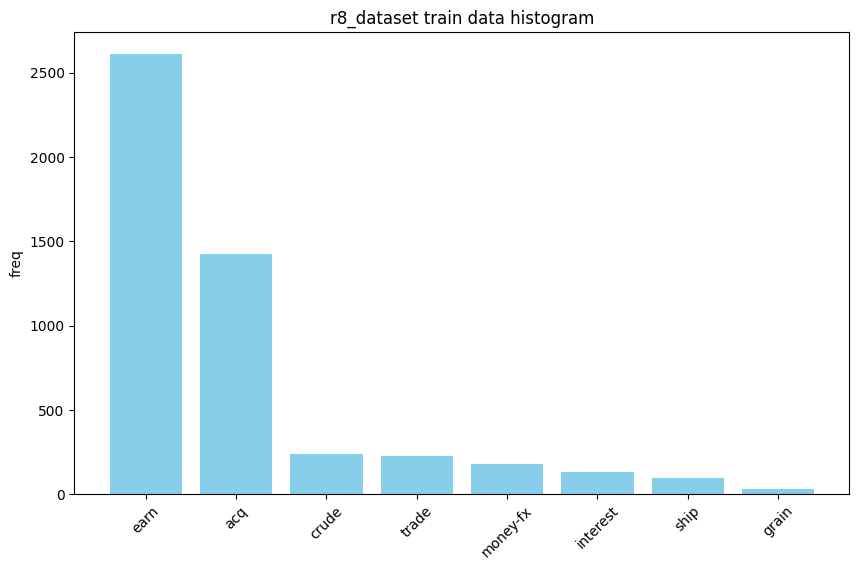

In [13]:
# 각 레이블의 빈도수 계산
label_counts = train_df['intent'].value_counts()

# 히스토그램으로 표현
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(label_counts.index, label_counts.values, color='skyblue')  # 막대 그래프 생성
plt.ylabel('freq')  # y축 레이블 설정
plt.title('r8_dataset train data histogram')  # 그래프 제목 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()  # 그래프 표시

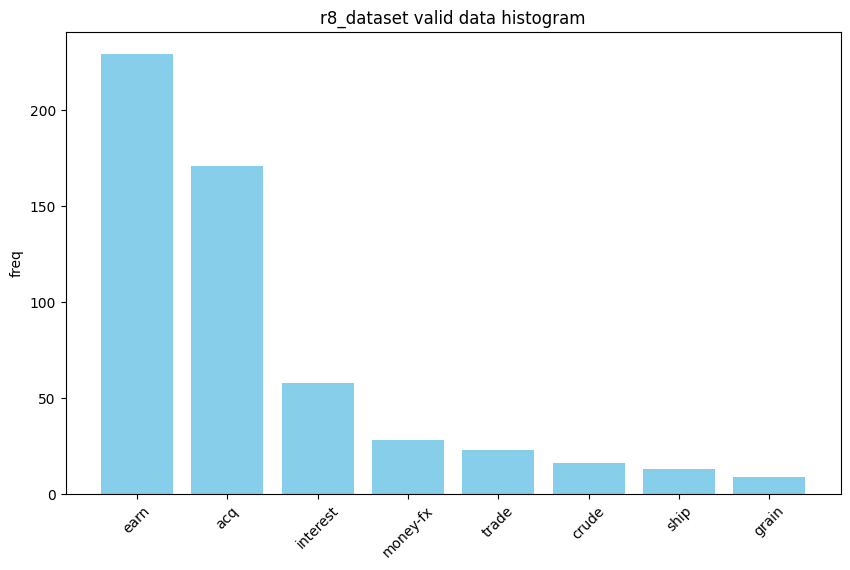

In [14]:
# 각 레이블의 빈도수 계산
label_counts = valid_df['intent'].value_counts()

# 히스토그램으로 표현
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(label_counts.index, label_counts.values, color='skyblue')  # 막대 그래프 생성
plt.ylabel('freq')  # y축 레이블 설정
plt.title('r8_dataset valid data histogram')  # 그래프 제목 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()  # 그래프 표시

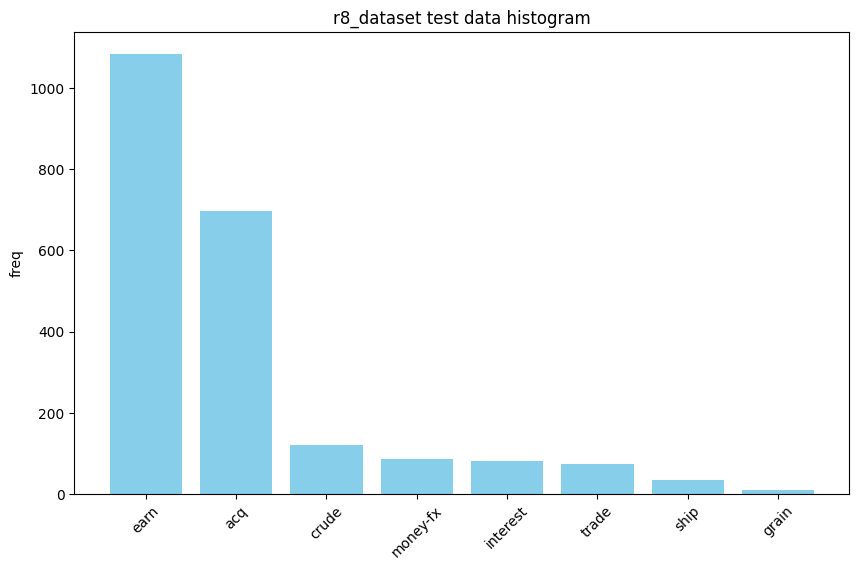

In [15]:
# 각 레이블의 빈도수 계산
label_counts = test_df['intent'].value_counts()

# 히스토그램으로 표현
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(label_counts.index, label_counts.values, color='skyblue')  # 막대 그래프 생성
plt.ylabel('freq')  # y축 레이블 설정
plt.title('r8_dataset test data histogram')  # 그래프 제목 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()  # 그래프 표시